In [1]:
import quantumpropagator as qp
import matplotlib.pyplot as plt
from ipywidgets import interact,fixed #, interactive, fixed, interact_manual
import ipywidgets as widgets
import os
import glob
import pandas as pd
#%matplotlib notebook
%matplotlib ipympl

plt.rcParams.update({'font.size': 10})

In [2]:
fol = '/home/alessio/Desktop/Dropbox/USA/bet/'
subfolders = sorted([dir for dir in os.listdir(fol) if os.path.isdir(os.path.join(fol,dir)) and dir != os.path.join(fol,'.ipynb_checkpoints')])
print(''.join(['{} -> {}\n'.format(a,b) for a,b in enumerate(subfolders)]))

0 -> b-pulseAlongX_0.22_goodG_0000
1 -> b-pulseAlongX_0.22_short_0_goodG_0000
2 -> b-pulseAlongX_0.22_short_pi_goodG_0000
3 -> c-Experiments_on_Nac_0000
4 -> d-experiments_smooth01_0000
5 -> d-experiments_smooth10_0000
6 -> d-experiments_smooth50_0000
7 -> h-IR-X_80_0000
8 -> i-IR-Z_80_0000
9 -> k-IR-Y_80_0000
10 -> l-IR-XZ-50_0000
11 -> l-IR-XZ-70_0000
12 -> l-IR-XZ-90_0000
13 -> m-only_IR_longer_with_nac_2_1_0000
14 -> m-only_IR_longer_with_nac_2_1_counterClock_0000
15 -> m-only_IR_longer_with_nac_2_1_inverted_phase_0000
16 -> m-only_IR_longer_with_nac_2_1_phase_pi_0000
17 -> m-only_IR_middle100_0000
18 -> m-only_IR_middle140_0000
19 -> m-only_IR_middle50_0000
20 -> m-only_IR_middle80_0000
21 -> m-only_IR_middle90_0000
22 -> m-only_IR_retarded75_0000
23 -> m-only_IR_retarded80_0000
24 -> m-only_IR_retarded85_0000
25 -> m-only_IR_retarded90_0000
26 -> m-only_IR_short_with_nac_2_1_0000
27 -> m-only_IR_short_with_nac_2_1_inverted_phase_0000
28 -> m-only_IR_short_with_nac_2_1_phase_pi_00

In [39]:
i_want = [0,18,36,37]
selected = [ subfolders[i] for i in i_want]

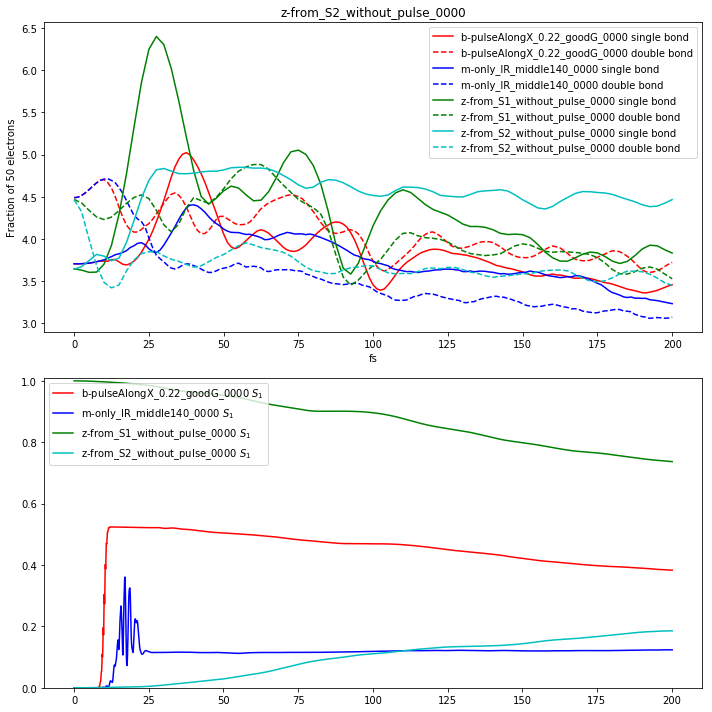

In [41]:
def graph_between_bonds(folder_list):
    fig, [ax0,ax1] = plt.subplots(2,1,figsize=(10,10))
    
    colors = ['r','b','g','c']
    
    for i, this_folder in enumerate(folder_list):
        abs_path = os.path.join(fol,this_folder)
        fir_file = os.path.join(abs_path, 'list_first.dat')
        sec_file = os.path.join(abs_path, 'list_second.dat')
        population_file = os.path.join(abs_path, 'outputPopul')
        dataP = pd.read_csv(population_file, delim_whitespace=True, header=None)
        fir = np.loadtxt(fir_file)
        sec = np.loadtxt(sec_file)
        norm = 0.317460*0.317460*0.317460
        ax0.plot(fir[:,0],fir[:,1]*norm, color=colors[i], ls='-', label='{} single bond'.format(this_folder))
        ax0.plot(sec[:,0],sec[:,1]*norm, color=colors[i], ls='--', label='{} double bond'.format(this_folder))
        ax1.plot(dataP[0],dataP[2], color=colors[i], ls='-', label=r'{} $S_1$'.format(this_folder))
    
    ax1.set_ylim([0,1.01])
    ax0.legend()
    ax1.legend()
    ax0.set_title(this_folder)
    ax0.set_xlabel('fs')
    ax0.set_ylabel('Fraction of 50 electrons')
    
    fig.tight_layout()
        
graph_between_bonds(selected)